**주요 라이브러리**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**matplotlib 한글 설정**

- 윈도우 10/11 운영체제에서 그래프에서 한글 표현하기.
- 우분투, 구글 코랩에서의 설정은 [matplotlib에서 한글 지원하기](https://github.com/codingalzi/datapy/blob/master/matplotlib-korean.md) 참고할 것.

In [ ]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

**데이터 파일 저장소**

In [2]:
base_url = "https://github.com/codingalzi/water-data/raw/master/reservoirs/"

**승천보 자료 불러오기**

In [13]:
seungchonbo_df = pd.read_excel(base_url+"Seungchonbo.xlsx", skiprows=0, header=1, sheet_name=None)

- 2012년부터 2022년까지의 데이터가 각각의 워크시트(worksheet)로 존재.
- 따라서 년도를 키로 갖는 사전 자료형으로 불러옴.
- 키값은 각각의 워크시트를 담은 데이터프레임.

In [23]:
type(seungchonbo_df)

dict

In [30]:
seungchonbo_df.keys()

dict_keys(['2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'])

- 2012년 데이터 정보 요약

In [34]:
seungchonbo_df['2012년'].info

<bound method DataFrame.info of                측정일/월 측정소명  수온 ℃  수소이온농도  전기전도도 μS/cm  용존산소 mg/L  총유기탄소 mg/L  \
0     2012-07-01 00h   용봉   NaN     NaN          NaN        NaN         NaN   
1     2012-07-01 01h   용봉   NaN     NaN          NaN        NaN         NaN   
2     2012-07-01 02h   용봉   NaN     NaN          NaN        NaN         NaN   
3     2012-07-01 03h   용봉   NaN     NaN          NaN        NaN         NaN   
4     2012-07-01 04h   용봉   NaN     NaN          NaN        NaN         NaN   
...              ...  ...   ...     ...          ...        ...         ...   
4338  2012-12-31 19h   용봉   4.4     6.9        374.0       11.3         2.5   
4339  2012-12-31 20h   용봉   4.3     6.9        374.0       11.4         2.5   
4340  2012-12-31 21h   용봉   4.3     6.9        373.0       11.4         2.5   
4341  2012-12-31 22h   용봉   4.3     6.9        375.0       11.4         2.5   
4342  2012-12-31 23h   용봉   4.1     6.9        375.0       11.4         2.5   

      총질소 mg/L  총인 

- 연도별 데이터 수

In [36]:
for year in seungchonbo_df:
    print(len(seungchonbo_df[year]))

4343
8750
8760
8739
8784
8730
8758
8760
8784
8760
3432


**승천보 데이터 다시 불러오기**

- 측정일을 행 인덱스로 사용
- 날짜 대상 파싱 실행

In [29]:
seungchonbo_df = pd.read_excel(base_url+"Seungchonbo.xlsx", skiprows=0, header=1, sheet_name=None, 
                                index_col=0, parse_dates=True)

* 2012년 데이터 정보 요약

In [31]:
seungchonbo_df['2012년'].info

<bound method DataFrame.info of                     측정소명  수온 ℃  수소이온농도  전기전도도 μS/cm  용존산소 mg/L  총유기탄소 mg/L  \
측정일/월                                                                        
2012-07-01 00:00:00   용봉   NaN     NaN          NaN        NaN         NaN   
2012-07-01 01:00:00   용봉   NaN     NaN          NaN        NaN         NaN   
2012-07-01 02:00:00   용봉   NaN     NaN          NaN        NaN         NaN   
2012-07-01 03:00:00   용봉   NaN     NaN          NaN        NaN         NaN   
2012-07-01 04:00:00   용봉   NaN     NaN          NaN        NaN         NaN   
...                  ...   ...     ...          ...        ...         ...   
2012-12-31 19:00:00   용봉   4.4     6.9        374.0       11.3         2.5   
2012-12-31 20:00:00   용봉   4.3     6.9        374.0       11.4         2.5   
2012-12-31 21:00:00   용봉   4.3     6.9        373.0       11.4         2.5   
2012-12-31 22:00:00   용봉   4.3     6.9        375.0       11.4         2.5   
2012-12-31 23:00:00   용봉   4.1  

**2012년 클로로필 A(조류) 열 대상**

In [18]:
seungchonbo2012CHLA = seungchonbo_df['2012년'].iloc[:, [-1]].copy()

In [19]:
seungchonbo2012CHLA

,클로로필-a mg/㎥
측정일/월,
2012-07-01 00:00:00,NaN
2012-07-01 01:00:00,NaN
2012-07-01 02:00:00,NaN
2012-07-01 03:00:00,NaN
2012-07-01 04:00:00,NaN
...,...
2012-12-31 19:00:00,6.9
2012-12-31 20:00:00,7.2
2012-12-31 21:00:00,7.0


- 결측치 행 삭제

In [33]:
SC2012CHLA_wo_NA = seungchonbo2012CHLA.dropna()
SC2012CHLA_wo_NA

,클로로필-a mg/㎥
측정일/월,
2012-09-20 15:00:00,6.0
2012-09-20 16:00:00,6.0
2012-09-20 17:00:00,6.0
2012-09-20 18:00:00,5.9
2012-09-20 19:00:00,5.8
...,...
2012-12-31 19:00:00,6.9
2012-12-31 20:00:00,7.2
2012-12-31 21:00:00,7.0


**조류가 가장 심한 시기 확인용 선그래프**

- 10월 초순이 가장 높아 보임
- 여름 데이터가 없음

<AxesSubplot:xlabel='측정일/월'>

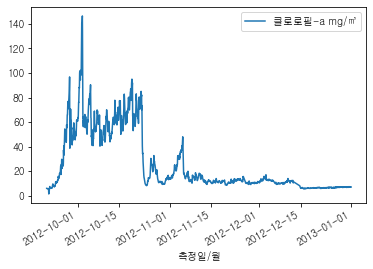

In [34]:
SC2012CHLA_wo_NA.plot()

- 2012년 10월 2일, 15시에 가장 조류 가장 심함

In [35]:
SC2012CHLA_wo_NA.idxmax()

클로로필-a mg/㎥   2012-10-02 15:00:00
dtype: datetime64[ns]

## 2013년 데이터

In [43]:
seungchonbo2013CHLA = seungchonbo_df['2013년'].iloc[:, [-1]].copy()

In [37]:
seungchonbo2013CHLA

,클로로필-a mg/㎥
측정일/월,
2013-01-01 00:00:00,7.2
2013-01-01 01:00:00,6.9
2013-01-01 02:00:00,6.8
2013-01-01 03:00:00,6.9
2013-01-01 04:00:00,6.9
...,...
2013-12-31 19:00:00,10.3
2013-12-31 20:00:00,9.9
2013-12-31 21:00:00,10.0


- 결측치 행 삭제

In [38]:
SC2013CHLA_wo_NA = seungchonbo2013CHLA.dropna()
SC2013CHLA_wo_NA

,클로로필-a mg/㎥
측정일/월,
2013-01-01 00:00:00,7.2
2013-01-01 01:00:00,6.9
2013-01-01 02:00:00,6.8
2013-01-01 03:00:00,6.9
2013-01-01 04:00:00,6.9
...,...
2013-12-31 19:00:00,10.3
2013-12-31 20:00:00,9.9
2013-12-31 21:00:00,10.0


**조류가 가장 심한 시기 확인용 선그래프**

- 5월 초순이 가장 높아 보임

<AxesSubplot:xlabel='측정일/월'>

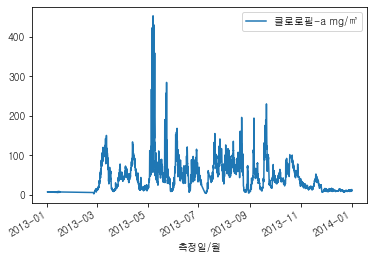

In [39]:
SC2013CHLA_wo_NA.plot()

- 2013년 5월 7일, 14시에 가장 조류 가장 심함

In [40]:
SC2013CHLA_wo_NA.idxmax()

클로로필-a mg/㎥   2013-05-07 14:00:00
dtype: datetime64[ns]

## 연도별 조류 최고점

In [44]:
for year in seungchonbo_df:
    seungchonboCHLA_year = seungchonbo_df[year].iloc[:, [-1]].copy()
    SC_CHLA_wo_NA = seungchonboCHLA_year.dropna()
    print(SC_CHLA_wo_NA.idxmax())

클로로필-a mg/㎥   2012-10-02 15:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2013-05-07 14:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2014-04-08 14:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2015-03-30 10:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2016-08-06 14:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2017-07-31 13:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2018-01-31 19:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2019-08-04 22:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2020-03-16 15:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2021-04-19 18:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2022-04-04 18:00:00
dtype: datetime64[ns]


## 연도별 결측치 개수

In [50]:
for year in seungchonbo_df:
    seungchonboCHLA_year = seungchonbo_df[year].iloc[:, [-1]].copy()
    print(f"{year} 전체 데이터 수: {len(seungchonboCHLA_year)}")
    print(f"{year} 결측치 데이터 수: {seungchonboCHLA_year.isna().sum()}")

2012년 전체 데이터 수: 4343
2012년 결측치 데이터 수: 클로로필-a mg/㎥    2073
dtype: int64
2013년 전체 데이터 수: 8750
2013년 결측치 데이터 수: 클로로필-a mg/㎥    1641
dtype: int64
2014년 전체 데이터 수: 8760
2014년 결측치 데이터 수: 클로로필-a mg/㎥    618
dtype: int64
2015년 전체 데이터 수: 8739
2015년 결측치 데이터 수: 클로로필-a mg/㎥    323
dtype: int64
2016년 전체 데이터 수: 8784
2016년 결측치 데이터 수: 클로로필-a mg/㎥    598
dtype: int64
2017년 전체 데이터 수: 8730
2017년 결측치 데이터 수: 클로로필-a mg/㎥    1545
dtype: int64
2018년 전체 데이터 수: 8758
2018년 결측치 데이터 수: 클로로필-a mg/㎥    6720
dtype: int64
2019년 전체 데이터 수: 8760
2019년 결측치 데이터 수: 클로로필-a mg/㎥    3517
dtype: int64
2020년 전체 데이터 수: 8784
2020년 결측치 데이터 수: 클로로필-a mg/㎥    2930
dtype: int64
2021년 전체 데이터 수: 8760
2021년 결측치 데이터 수: 클로로필-a mg/㎥    1319
dtype: int64
2022년 전체 데이터 수: 3432
2022년 결측치 데이터 수: 클로로필-a mg/㎥    170
dtype: int64
